In [ ]:
from keras.datasets import mnist, fashion_mnist
(_,_), (X1,y1) = mnist.load_data()
(_,_), (X2,y2) = fashion_mnist.load_data()

#minist_data

In [ ]:
X1.shape, y1.shape

((10000, 28, 28), (10000,))

In [ ]:
X1 = X1.reshape(-1, 28, 28, 1)
y1 = y1.reshape(-1, 1)

In [ ]:
X1 = X1 / 255.0

In [ ]:
from sklearn.model_selection import train_test_split
x_data1, test_x1, y_data1, test_y1 = train_test_split(X1, y1, test_size = 0.3, random_state = 42, stratify = y1)
train_x1, val_x1, train_y1, val_y1 = train_test_split(x_data1, y_data1, test_size = 0.2, random_state = 42, stratify = y_data1)

In [ ]:
import numpy as np
np.unique(y1)

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8)

In [ ]:
train_x1.shape, test_x1.shape, val_x1.shape, train_y1.shape, test_y1.shape, val_y1.shape

((5600, 28, 28, 1),
 (3000, 28, 28, 1),
 (1400, 28, 28, 1),
 (5600, 1),
 (3000, 1),
 (1400, 1))

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, BatchNormalization, Dropout
from keras.losses import sparse_categorical_crossentropy
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.optimizers import Adam

In [ ]:
ck_m = ModelCheckpoint('mnist_best_m.h5', monitor = 'val acc', save_best_only = True)
es = EarlyStopping(patience = 10, restore_best_weights = True)

In [ ]:
m1 = Sequential()
m1.add(Conv2D(32, 3, activation = 'relu', padding = 'same', input_shape = train_x1.shape[1:],))
m1.add(Conv2D(32, 3, activation = 'relu', padding = 'same'))
m1.add(BatchNormalization())
m1.add(MaxPooling2D(2))
m1.add(Dropout(0.2))
m1.add(Conv2D(64, 3, activation = 'relu', padding = 'same'))
m1.add(Conv2D(64, 3, activation = 'relu', padding = 'same'))
m1.add(BatchNormalization())
m1.add(MaxPooling2D(2))
m1.add(Dropout(0.3))
m1.add(Conv2D(128, 3, activation = 'relu', padding = 'same'))
m1.add(Conv2D(128, 3, activation = 'relu', padding = 'same'))
m1.add(Conv2D(128, 3, activation = 'relu', padding = 'same'))
m1.add(BatchNormalization())
m1.add(MaxPooling2D(2))
m1.add(Dropout(0.5))
m1.add(Flatten())
m1.add(Dense(32, activation = 'relu'))
m1.add(Dense(64, activation = 'relu'))
m1.add(Dense(10, activation = 'softmax'))
m1.compile(optimizer = Adam(learning_rate = 0.00001), loss = 'sparse_categorical_crossentropy', metrics = 'acc')
hy1 = m1.fit(train_x1, train_y1, validation_data = (val_x1, val_y1), epochs = 100, batch_size = 128, callbacks = [es, ck_m])

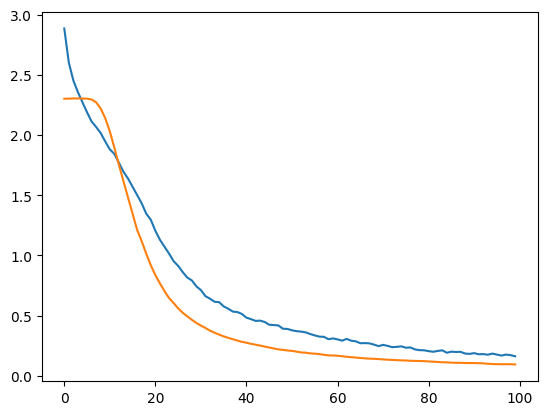

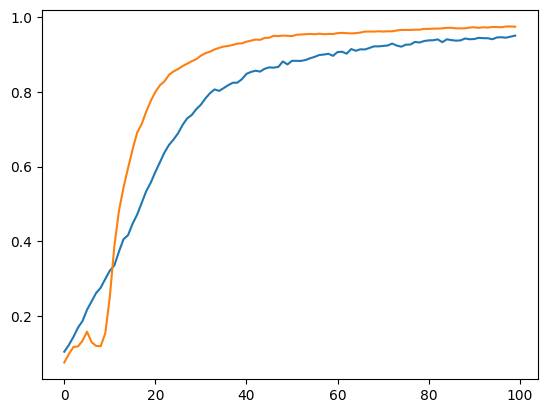

In [ ]:
import matplotlib.pyplot as plt
plt.plot(hy1.history["loss"])
plt.plot(hy1.history["val_loss"])
plt.show()
plt.plot(hy1.history["acc"])
plt.plot(hy1.history["val_acc"])

In [ ]:
m1.evaluate(test_x1, test_y1)

94/94 [==============================] - 1s 7ms/step - loss: 0.1116 - acc: 0.9640


[0.11163635551929474, 0.9639999866485596]

예측기 설계

In [ ]:
import numpy as np
def f(m_name, x):
    r_x = x.reshape(-1, 28, 28, 1)
    s_x = r_x / 255
    l_m = load_model(m_name)
    out = np.argmax(l_m.predict(s_x), axis = 1)
    return out

In [ ]:
from sklearn.metrics import classification_report
py = f('b_cnn_m.h5', tt_x)
ty = tt_y
print(classification_report(ty, py))

#fashion_mnist_data

(28, 28, 1)


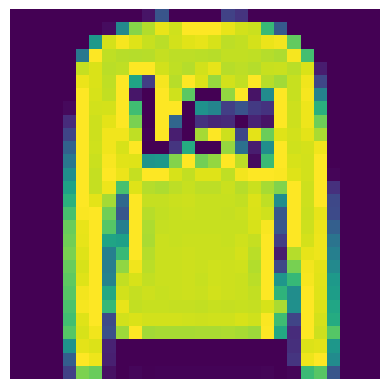

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(X2[1])
plt.axis('off')
print(X2[1].shape)

In [ ]:
X2.shape, y2.shape

((32, 32, 28), (10000,))

In [ ]:
import cv2
X = []
for i in X2:
    resize_x = cv2.resize(i, (32, 32))
    X.append(resize_x)
X = np.array(X)

(-0.5, 31.5, 31.5, -0.5)

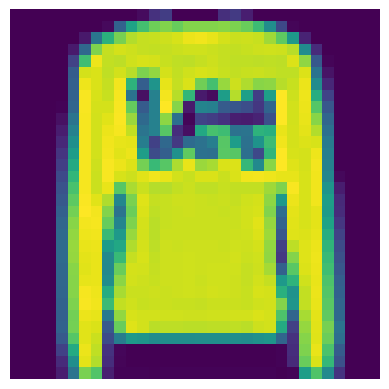

In [ ]:
plt.imshow(X[1])
plt.axis('off')

In [ ]:
X = X.astype('float32') / 255.0
X = np.stack((X,) * 3, axis=-1)

In [ ]:
X.shape, y2.shape

((10000, 32, 32, 3), (10000, 1))

In [ ]:
print(X2[1])

In [ ]:
y2 = y2.reshape(-1, 1)

In [ ]:
from sklearn.model_selection import train_test_split
x_data2, test_x2, y_data2, test_y2 = train_test_split(X, y2, test_size = 0.3, random_state = 42, stratify = y2)
train_x2, val_x2, train_y2, val_y2 = train_test_split(x_data2, y_data2, test_size = 0.2, random_state = 42, stratify = y_data2)

In [ ]:
train_x2.shape

(5600, 32, 32, 3)

In [ ]:
train_x2.shape, test_x2.shape, val_x2.shape, train_y2.shape, test_y2.shape, val_y2.shape

((5600, 32, 32, 3),
 (3000, 32, 32, 3),
 (1400, 32, 32, 3),
 (5600, 1),
 (3000, 1),
 (1400, 1))

In [ ]:
from keras.callbacks import ModelCheckpoint, EarlyStopping
ck_m = ModelCheckpoint('best_c.h5', monitor = 'val_acc', save_best_only = True)
es = EarlyStopping(patience = 10, restore_best_weights = True)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense, Rescaling, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization, RandomFlip, RandomZoom, RandomRotation, Input
from keras.applications import VGG16, VGG19, MobileNet, Xception, ResNet50, InceptionV3
add_m = Sequential()
add_m.add(Input(shape = (32, 32, 3)))
add_m.add(Rescaling(1./255))
add_m.add(RandomFlip('horizontal'))
add_m.add(RandomRotation(0.1))
add_m.add(RandomZoom(0.2))
add_m.add(VGG16(include_top = False))
add_m.add(Flatten())
add_m.add(Dense(10, activation = 'softmax'))
add_m.layers[4].trainable = False
add_m.summary()
add_m.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy', metrics = 'acc')
hy2 = add_m.fit(train_x2, train_y2, validation_data = (val_x2, val_y2), batch_size = 128, epochs = 10, callbacks = [es, ck_m])

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 rescaling_7 (Rescaling)     (None, 32, 32, 3)         0         
                                                                 
 random_flip_7 (RandomFlip)  (None, 32, 32, 3)         0         
                                                                 
 random_rotation_7 (RandomR  (None, 32, 32, 3)         0         
 otation)                                                        
                                                                 
 random_zoom_7 (RandomZoom)  (None, 32, 32, 3)         0         
                                                                 
 vgg16 (Functional)          (None, None, None, 512)   14714688  
                                                                 
 flatten_2 (Flatten)         (None, 512)               0         
                                                      

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Epoch 2/10
44/44 [==============================] - 84s 2s/step - loss: 2.3066 - acc: 0.0959 - val_loss: 2.3046 - val_acc: 0.1000
Epoch 3/10
44/44 [==============================] - 81s 2s/step - loss: 2.3072 - acc: 0.0980 - val_loss: 2.3064 - val_acc: 0.1000
Epoch 4/10
44/44 [==============================] - 79s 2s/step - loss: 2.3072 - acc: 0.0977 - val_loss: 2.3077 - val_acc: 0.1000
Epoch 5/10
44/44 [==============================] - 80s 2s/step - loss: 2.3073 - acc: 0.1013 - val_loss: 2.3051 - val_acc: 0.1000
Epoch 6/10
44/44 [==============================] - 75s 2s/step - loss: 2.3084 - acc: 0.0946 - val_loss: 2.3044 - val_acc: 0.1000
Epoch 7/10
44/44 [==============================] - 80s 2s/step - loss: 2.3061 - acc: 0.1004 - val_loss: 2.3045 - val_acc: 0.1000
Epoch 8/10
44/44 [==============================] - 81s 2s/step - loss: 2.3062 - acc: 0.0996 - val_loss: 2.3079 - val_acc: 0.1000
Epoch 9/10
44/44 [==============================] - 74s 2s/step - loss: 2.3065 - acc: 0.09

In [ ]:
add_m.layers

#강사님 fashion_mnist

In [1]:
from keras.datasets import fashion_mnist
(_,_), (X,y) = fashion_mnist.load_data()

4422102/4422102 [==============================] - 0s 0us/step


In [2]:
X.shape, y.shape

((10000, 28, 28), (10000,))

In [3]:
X = X.reshape(-1, 28, 28, 1)

In [5]:
X[:1].shape

(1, 28, 28, 1)

In [7]:
import numpy as np

In [9]:
np.tile(X[:1], (1, 1, 1, 3)).shape

(1, 28, 28, 3)

In [10]:
np.tile(X, (1, 1, 1, 3)).shape

(10000, 28, 28, 3)

In [11]:
from keras.applications import VGG16
from keras.layers import Input, Dense
from keras.models import Model, Sequential
from keras.layers import MaxPooling2D

In [12]:
vgg = VGG16(include_top = False)

58889256/58889256 [==============================] - 0s 0us/step


In [15]:
vgg = VGG16(include_top = False, input_shape = (32, 32, 3))
vgg.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 32, 32, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 32, 32, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 32, 32, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 16, 16, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 16, 16, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 16, 16, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 8, 8, 128)         0     

In [ ]:
end_m = Sequential()
end_m.add(Input(shape = (28, 28, 3)))
for i in vgg.layers[1:-4]:
    i